# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 1 | umm lajj
Processing Record 3 of Set 1 | itaituba
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | satitoa
City not found. Skipping...
Processing Record 6 of Set 1 | filadelfia
Processing Record 7 of Set 1 | miramar
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | gunjur
Processing Record 11 of Set 1 | nara
Processing Record 12 of Set 1 | saint george
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | naron
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | honjo
Processing Record 20 of Set 1 | charters towers
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,umm lajj,25.0213,37.2685,295.92,59,0,3.79,SA,1667877469
1,itaituba,-4.2761,-55.9836,296.34,97,97,0.68,BR,1667877470
2,butaritari,3.0707,172.7902,300.12,73,17,2.05,KI,1667877470
3,filadelfia,39.9523,-75.1638,290.91,32,20,7.72,US,1667877437
4,miramar,25.9873,-80.2323,299.16,82,75,4.63,US,1667877471


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,umm lajj,25.0213,37.2685,295.92,59,0,3.79,SA,1667877469
1,itaituba,-4.2761,-55.9836,296.34,97,97,0.68,BR,1667877470
2,butaritari,3.0707,172.7902,300.12,73,17,2.05,KI,1667877470
3,filadelfia,39.9523,-75.1638,290.91,32,20,7.72,US,1667877437
4,miramar,25.9873,-80.2323,299.16,82,75,4.63,US,1667877471


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

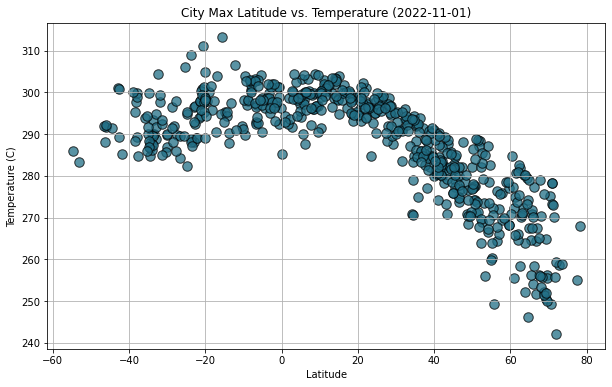

<Figure size 432x288 with 0 Axes>

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

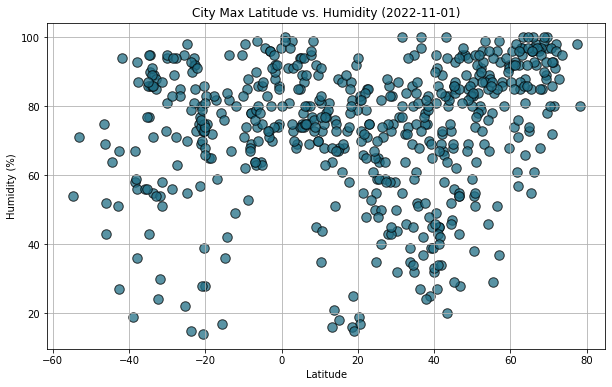

<Figure size 432x288 with 0 Axes>

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

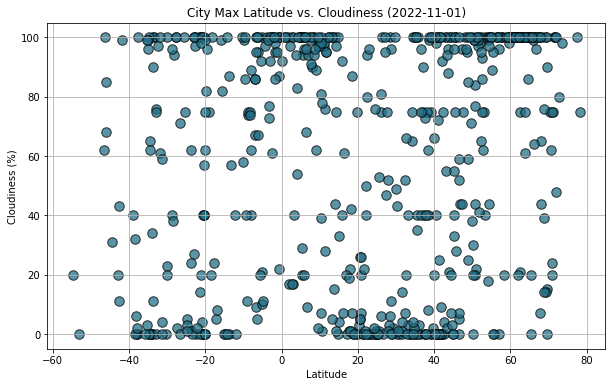

<Figure size 432x288 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

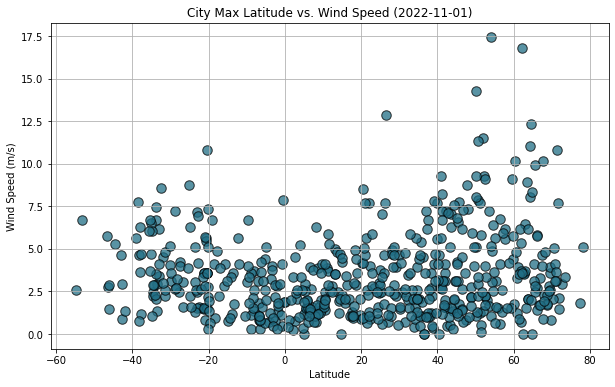

<Figure size 432x288 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(x_values,y_values,s=90, marker='o', c='#216F86',alpha=.75, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2022-11-01)')
plt.grid()
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[(city_data_df["Lat"]>= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,umm lajj,25.0213,37.2685,295.92,59,0,3.79,SA,1667877469
2,butaritari,3.0707,172.7902,300.12,73,17,2.05,KI,1667877470
3,filadelfia,39.9523,-75.1638,290.91,32,20,7.72,US,1667877437
4,miramar,25.9873,-80.2323,299.16,82,75,4.63,US,1667877471
5,tuktoyaktuk,69.4541,-133.0374,256.15,78,0,3.60,CA,1667877471


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[(city_data_df["Lat"]< 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,itaituba,-4.2761,-55.9836,296.34,97,97,0.68,BR,1667877470
6,bredasdorp,-34.5322,20.0403,286.61,90,65,2.44,ZA,1667877471
10,busselton,-33.6500,115.3333,293.35,55,90,2.95,AU,1667877472
15,charters towers,-20.1000,146.2667,304.99,28,0,2.78,AU,1667877474
16,puerto ayora,-0.7393,-90.3518,292.34,86,87,0.45,EC,1667877474


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7498468035009304


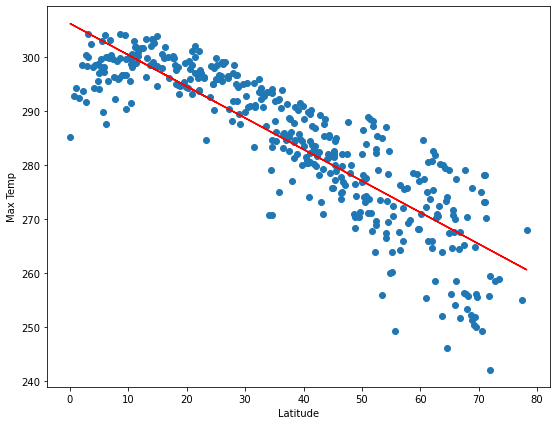

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

plt.show()

R squared: 0.21695569947347526


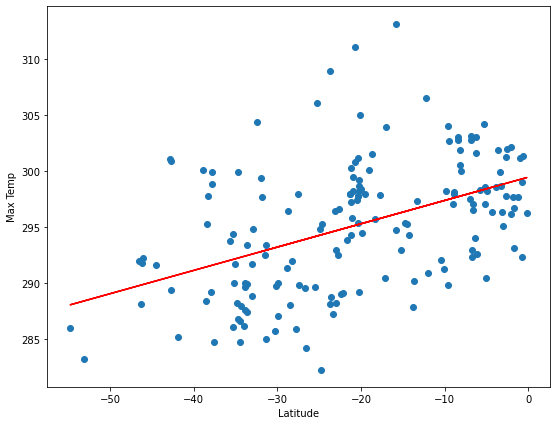

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.05193594148079594


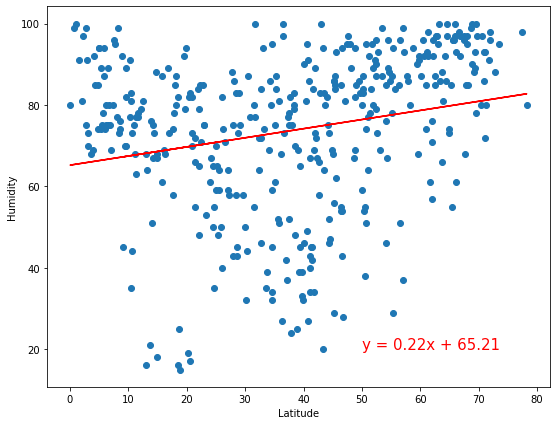

In [17]:
# Northern Hemisphere
# Linear regression
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")
 
plt.show()

R squared: 0.056411866193682055


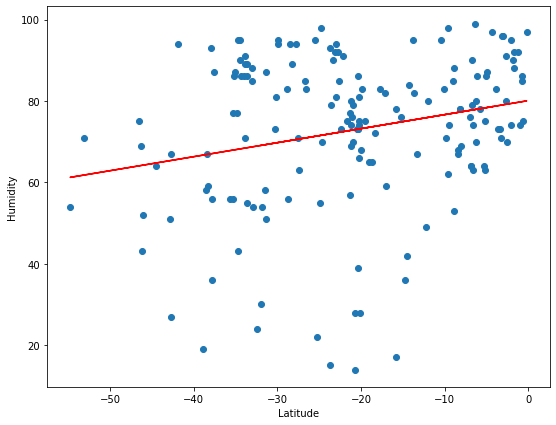

In [18]:
# Southern Hemisphere
# Linear regression
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.03112839973780335


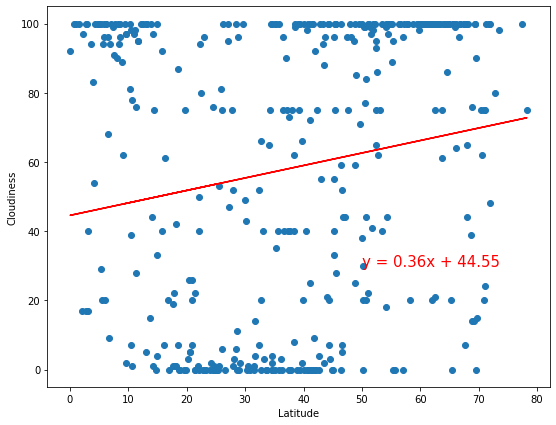

In [19]:
# Northern Hemisphere
# Linear regression 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")
 
plt.show()

R squared: 0.08424189862758232


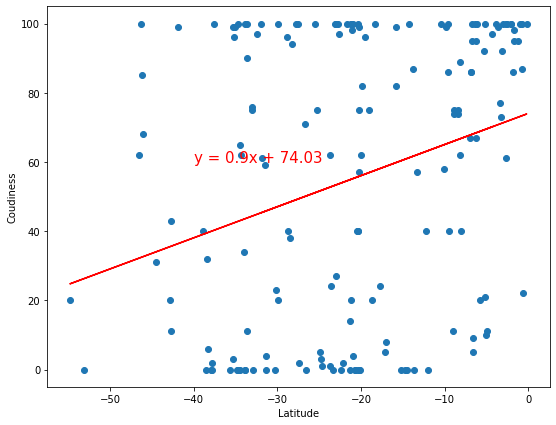

In [20]:
# Southern Hemisphere
# Linear regression 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Coudiness')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.06141452513993361


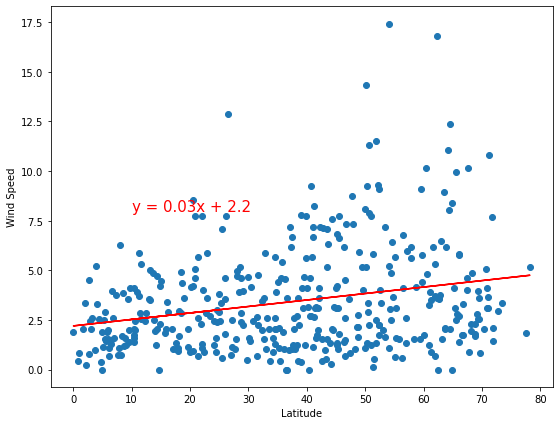

In [21]:
# Northern Hemisphere
# Linear regression 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")
 
plt.show()

R squared: 0.09742442396487787


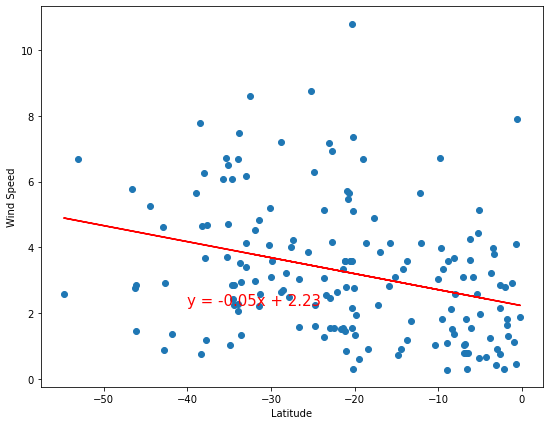

In [22]:
# Southern Hemisphere
# Linear regression 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
fig, ax = plt.subplots(figsize=(9, 7))
plt.scatter(x_values,y_values)
 
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,2.25),fontsize=15,color="red")
 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")
 
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE